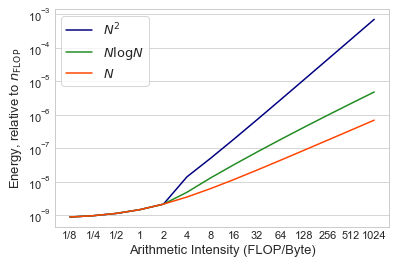

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from math import log, ceil

fig, ax = plt.subplots()
AI = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]
s = len(AI)
axes = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
sns.set_style("whitegrid")

# GPU
# Ef = 213 * 1e-12;
# Em = 513 * 1e-12;

Tf = 1/(53.28*1e9);
Tm = 1/(25.6*1e9);
Ef = 670 * 1e-12;
Em = 795 * 1e-12;
p0 = 0; #122
E0 = p0*Tf;
Bt = [Tm/Tf];
Be = Em/Ef;
Ef1 = Ef + E0;
eta = Ef/Ef1;
Be1 = eta * Be + (1-eta) * np.maximum(0,np.subtract(Bt,AI));
E = Ef1*(1+Be1/AI);

# print len(E)
# Emodel = 1/E/1e9;
# ax.plot(AI, Emodel,label='CPU',color='orangered') 

W = [0] * s
index = 0
for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
    if(np.maximum(1,np.divide(Bt,AI[index])) > 1):
        W[index] = i
    else:
        W[index] = i**2
    index = index + 1
E_W = np.multiply(E, W);
line1, = ax.plot(AI, E_W,label='$N^2$',color='navy')

W = [0] * s
index = 0
for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
    if(np.maximum(1,np.divide(Bt,AI[index])) > 1):
        W[index] = i
    else:
        W[index] = i * np.log(i)
    index = index + 1
E_W = np.multiply(E, W);
line1, = ax.plot(AI, E_W,label='$N \log N$',color='forestgreen')

W = [0] * s
index = 0
for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
    W[index] = i
    index = index + 1
E_W = np.multiply(E, W);
line1, = ax.plot(AI, E_W,label='$N$',color='orangered')

# W = [0] * s
# index = 0
# for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
#     if(np.maximum(1,np.divide(Be,AI[index])) > 1):
#         W[index] = i
#     else:
#         W[index] = i**2
#     index = index + 1
# W_Tf = np.multiply(Ef, W);
# T = W_Tf * np.maximum(1,np.divide(Be,AI));
# line1, = ax.plot(AI, T * 1e9,color='navy')

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

sns.set_context(rc={"font.size":11})   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
ax.set_xticklabels(['1/8','1/4','1/2','1','2','4','8','16','32','64','128','256','512','1024'],rotation=0)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticks(AI)                                                       
ax.set_ylabel('Energy, relative to $n_{\mathrm{FLOP}}$',size=13)
ax.set_xlabel('Arithmetic Intensity (FLOP/Byte)',size=13)

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.show()
fig = ax.get_figure()
fig.savefig('efficiencyE.pdf',bbox_inches='tight')